# 0. Importando as bibliotecas necessárias

In [6]:
#!pip install yfinance --upgrade --no-cache-dir

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction import DictVectorizer
import yfinance as yf

# 1. Aquisição dos dados de Ações

In [125]:
ticket = yf.Ticker('^BVSP')
#df = ticket.history(period='3y', interval='1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')

In [126]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0
2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0
2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0
2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0
2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-22 00:00:00-03:00,115825.0,116903.0,115648.0,116348.0,6947900,0.0,0.0
2020-12-23 00:00:00-03:00,116636.0,118311.0,116636.0,117857.0,6483300,0.0,0.0
2020-12-28 00:00:00-03:00,117806.0,119213.0,117805.0,119051.0,7171700,0.0,0.0


In [127]:
#pegando os últimos valores do DataFrame
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-22 00:00:00-03:00,115825.0,116903.0,115648.0,116348.0,6947900,0.0,0.0
2020-12-23 00:00:00-03:00,116636.0,118311.0,116636.0,117857.0,6483300,0.0,0.0
2020-12-28 00:00:00-03:00,117806.0,119213.0,117805.0,119051.0,7171700,0.0,0.0
2020-12-29 00:00:00-03:00,119130.0,119861.0,118750.0,119475.0,6769700,0.0,0.0
2020-12-30 00:00:00-03:00,119410.0,120150.0,118919.0,119306.0,8235700,0.0,0.0


## 2. Decompondo a Série Temporal

MODELOS MATEMÁTICOS
    
    ADDITIVE
    y(t) = trend_t + Seasonality_t + Noise_t
    
    MULTIPICATTIVE
    y(t) = trend_t * Seasonality_t * Noise_t

In [128]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2018-01-02 00:00:00-02:00 to 2020-12-30 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   741 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [129]:
df[['Close']].head()

,Close
Date,
2018-01-02 00:00:00-02:00,77891.0
2018-01-03 00:00:00-02:00,77995.0
2018-01-04 00:00:00-02:00,78647.0
2018-01-05 00:00:00-02:00,79071.0
2018-01-08 00:00:00-02:00,79379.0


In [130]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

In [131]:
decomposicao

<AxesSubplot:xlabel='Date'>

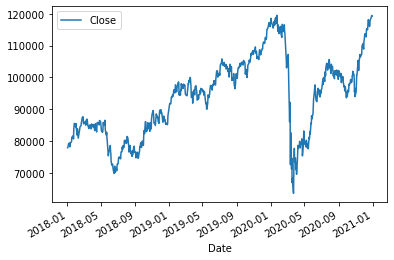

In [132]:
df[['Close']].plot()

In [133]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02 00:00:00-02:00     77891.0
2018-01-03 00:00:00-02:00     77995.0
2018-01-04 00:00:00-02:00     78647.0
2018-01-05 00:00:00-02:00     79071.0
2018-01-08 00:00:00-02:00     79379.0
                               ...   
2020-12-22 00:00:00-03:00    116348.0
2020-12-23 00:00:00-03:00    117857.0
2020-12-28 00:00:00-03:00    119051.0
2020-12-29 00:00:00-03:00    119475.0
2020-12-30 00:00:00-03:00    119306.0
Length: 741, dtype: float64

In [134]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02 00:00:00-02:00    80582.442675
2018-01-03 00:00:00-02:00    80704.429227
2018-01-04 00:00:00-02:00    80826.415780
2018-01-05 00:00:00-02:00    80948.402332
2018-01-08 00:00:00-02:00    81070.388884
Name: trend, dtype: float64

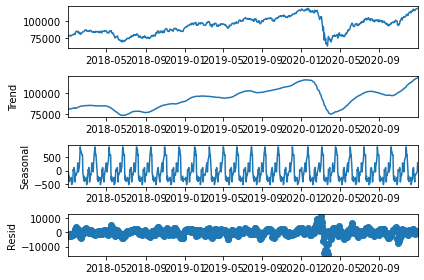

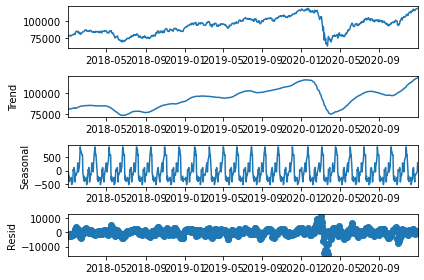

In [135]:
decomposicao.plot()

In [136]:
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', period=30, extrapolate_trend=30)

In [137]:
decomposicao_multi.seasonal

Date
2018-01-02 00:00:00-02:00    0.999506
2018-01-03 00:00:00-02:00    0.995696
2018-01-04 00:00:00-02:00    0.997951
2018-01-05 00:00:00-02:00    0.995404
2018-01-08 00:00:00-02:00    0.996471
                               ...   
2020-12-22 00:00:00-03:00    0.999131
2020-12-23 00:00:00-03:00    0.998075
2020-12-28 00:00:00-03:00    0.999495
2020-12-29 00:00:00-03:00    1.000454
2020-12-30 00:00:00-03:00    1.004161
Name: seasonal, Length: 741, dtype: float64

In [138]:
#Valor do ruído
max(decomposicao_multi.resid)

1.1168764268877

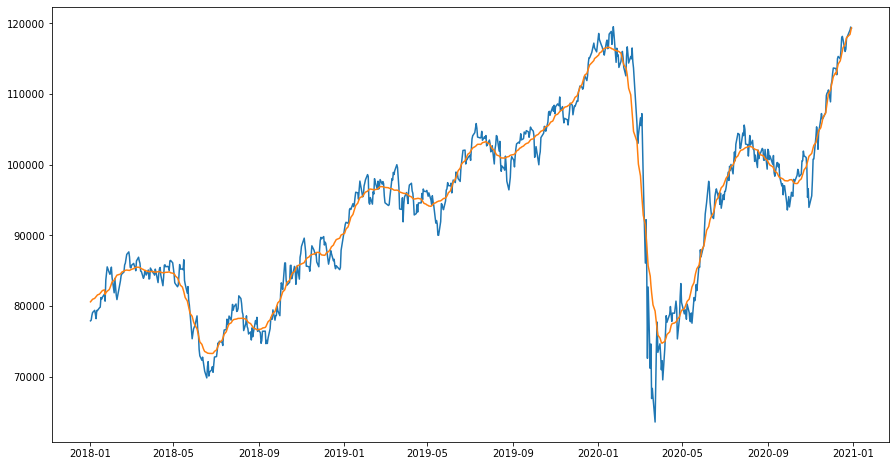

In [139]:
ax, fig = plt.subplots(figsize = (15, 8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

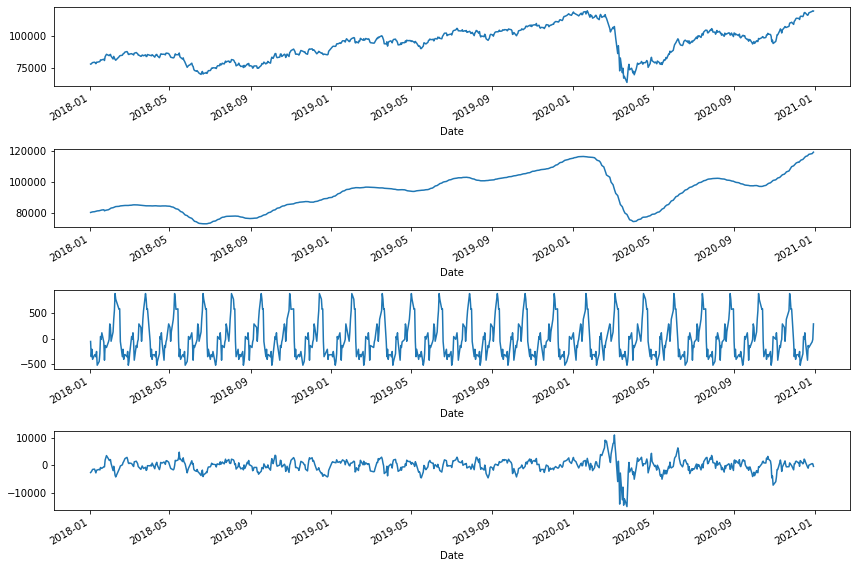

In [140]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12, 8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

# 3. Cáculo de Média Móvel

In [141]:
#Primeiros dados ficam nulos para que a função Rolling funcione corretamente
df['Close'].rolling(7).mean()

Date
2018-01-02 00:00:00-02:00              NaN
2018-01-03 00:00:00-02:00              NaN
2018-01-04 00:00:00-02:00              NaN
2018-01-05 00:00:00-02:00              NaN
2018-01-08 00:00:00-02:00              NaN
                                 ...      
2020-12-22 00:00:00-03:00    116752.571429
2020-12-23 00:00:00-03:00    117164.285714
2020-12-28 00:00:00-03:00    117579.285714
2020-12-29 00:00:00-03:00    117797.571429
2020-12-30 00:00:00-03:00    117961.714286
Name: Close, Length: 741, dtype: float64

In [142]:
media_movel7dias  = df['Close'].rolling(7).mean()
media_movel14dias = df['Close'].rolling(14).mean()
media_movel21dias = df['Close'].rolling(21).mean()

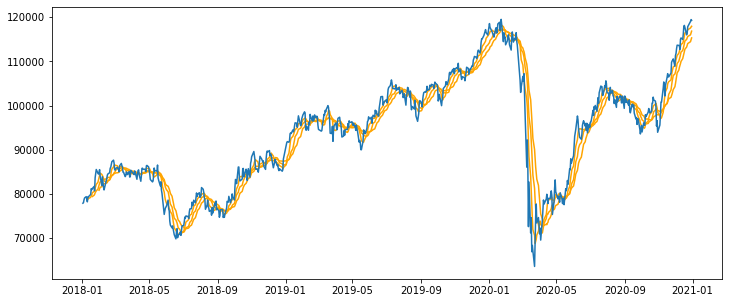

In [143]:
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(media_movel7dias, 'orange')
plt.plot(media_movel14dias, 'orange')
plt.plot(media_movel21dias, 'orange')
plt.plot(df['Close'])

# 4. Extração de Features

In [144]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0
2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0
2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0
2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0
2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0


In [145]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0


In [146]:
#Criar features para cada período
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [147]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0,2018,1,2
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0,2018,1,3
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0,2018,1,4
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0,2018,1,5
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0,2018,1,8


In [148]:
df['Close'].shift()

0           NaN
1       77891.0
2       77995.0
3       78647.0
4       79071.0
         ...   
736    116016.0
737    116348.0
738    117857.0
739    119051.0
740    119475.0
Name: Close, Length: 741, dtype: float64

In [149]:
df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 - 100

In [150]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0,2018,1,2,NaN
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0,2018,1,3,0.133520
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0,2018,1,4,0.835951
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0,2018,1,5,0.539118
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0,2018,1,8,0.389523


In [165]:
def features_extraction(df_):
    #Criar features para cada período
    df_['year']  = df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day']   = df_['Date'].dt.day
    df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 - 100

# Hipótese 1: melhor mês para investir

<AxesSubplot:xlabel='month'>

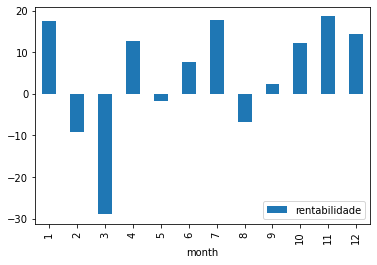

In [166]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [167]:
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

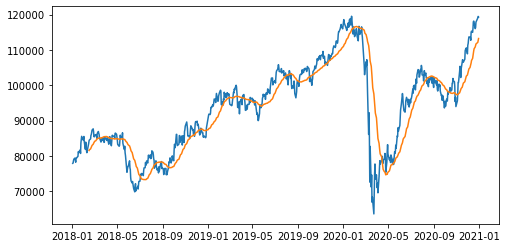

In [168]:
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize = (8, 4))
plt.plot(df['Close'])
plt.plot(media_movel30d)

# Hipótese 2: o melhor dia para investir

<AxesSubplot:xlabel='day'>

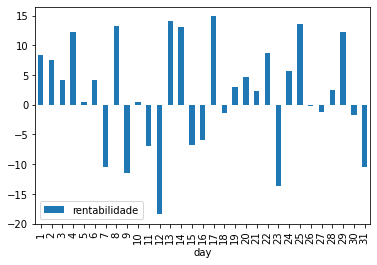

In [169]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [170]:
df.iloc[0]

Open               76403.0
High               77909.0
Low                76403.0
Close              77891.0
Volume           2880300.0
Dividends              0.0
Stock Splits           0.0
year                2018.0
month                  1.0
day                    2.0
rentabilidade          NaN
Name: 2018-01-02 00:00:00-02:00, dtype: float64

# 5. Correlação de Séries Temporais

In [171]:
tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA', '^BVSP', 'USDBRL=X']

In [172]:
dfs = []

for t in tickets:
    print('Reading Tickets {}...'.format(t))
    ticket = yf.Ticker(t)
    aux = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')
    aux.reset_index(inplace=True)
    aux['ticket'] = t
    dfs.append(aux)

Reading Tickets VALE3.SA...
Reading Tickets ITUB4.SA...
Reading Tickets PETR4.SA...
Reading Tickets ABEV3.SA...
Reading Tickets BBDC4.SA...
Reading Tickets BBAS3.SA...
Reading Tickets ^BVSP...
Reading Tickets USDBRL=X...


In [173]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02 00:00:00-02:00,27.582309,28.468983,27.582309,28.455341,14156500,0.0,0.0,VALE3.SA
1,2018-01-03 00:00:00-02:00,28.530365,28.564467,28.168874,28.284824,12744200,0.0,0.0,VALE3.SA
2,2018-01-04 00:00:00-02:00,28.516729,28.898678,28.318932,28.400778,18433000,0.0,0.0,VALE3.SA
3,2018-01-05 00:00:00-02:00,28.353030,28.844110,28.175697,28.844110,15251300,0.0,0.0,VALE3.SA
4,2018-01-08 00:00:00-02:00,28.919140,29.485245,28.919140,29.485245,14542800,0.0,0.0,VALE3.SA
...,...,...,...,...,...,...,...,...,...
737,2020-12-22 00:00:00-03:00,65.921896,66.020556,64.836605,65.982613,23157000,0.0,0.0,VALE3.SA
738,2020-12-23 00:00:00-03:00,65.671444,66.430388,65.572783,66.301369,17710200,0.0,0.0,VALE3.SA
739,2020-12-28 00:00:00-03:00,66.627724,67.227290,66.088874,66.263428,26001300,0.0,0.0,VALE3.SA
740,2020-12-29 00:00:00-03:00,66.764319,66.938873,65.656261,66.081268,19727500,0.0,0.0,VALE3.SA


In [174]:
#Extraindo as Features
for d in dfs:
    features_extraction(d)

In [175]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,rentabilidade
0,2018-01-02 00:00:00-02:00,27.582309,28.468983,27.582309,28.455341,14156500,0.0,0.0,VALE3.SA,2018,1,2,NaN
1,2018-01-03 00:00:00-02:00,28.530365,28.564467,28.168874,28.284824,12744200,0.0,0.0,VALE3.SA,2018,1,3,-0.599244
2,2018-01-04 00:00:00-02:00,28.516729,28.898678,28.318932,28.400778,18433000,0.0,0.0,VALE3.SA,2018,1,4,0.409949
3,2018-01-05 00:00:00-02:00,28.353030,28.844110,28.175697,28.844110,15251300,0.0,0.0,VALE3.SA,2018,1,5,1.560988
4,2018-01-08 00:00:00-02:00,28.919140,29.485245,28.919140,29.485245,14542800,0.0,0.0,VALE3.SA,2018,1,8,2.222756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2020-12-22 00:00:00-03:00,65.921896,66.020556,64.836605,65.982613,23157000,0.0,0.0,VALE3.SA,2020,12,22,0.092101
738,2020-12-23 00:00:00-03:00,65.671444,66.430388,65.572783,66.301369,17710200,0.0,0.0,VALE3.SA,2020,12,23,0.483091
739,2020-12-28 00:00:00-03:00,66.627724,67.227290,66.088874,66.263428,26001300,0.0,0.0,VALE3.SA,2020,12,28,-0.057225
740,2020-12-29 00:00:00-03:00,66.764319,66.938873,65.656261,66.081268,19727500,0.0,0.0,VALE3.SA,2020,12,29,-0.274902


In [176]:
#Calculando uma Correlação
correlacao = pd.DataFrame()
for d in dfs:
    correlacao[d['ticket'].iloc[0]] = d['rentabilidade']

In [177]:
correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599244,0.683703,0.906352,0.230521,0.459782,1.275421,0.133520,0.102796
2,0.409949,2.082372,0.179636,-0.551955,1.640727,0.959523,0.835951,-1.606765
3,1.560988,0.288274,0.597738,0.369998,0.566395,0.000000,0.539118,-0.684511
4,2.222756,-0.331656,1.188366,-0.184328,-0.028141,0.237595,0.389523,-0.074182


In [178]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.402225,0.518188,0.284906,0.448638,0.444220,-0.164628,0.043291
ITUB4.SA,0.402225,1.000000,0.610520,0.518501,0.906408,0.814685,-0.087715,-0.063395
PETR4.SA,0.518188,0.610520,1.000000,0.427520,0.658391,0.688906,-0.154042,-0.014080
ABEV3.SA,0.284906,0.518501,0.427520,1.000000,0.535034,0.465095,-0.201329,-0.045189
BBDC4.SA,0.448638,0.906408,0.658391,0.535034,1.000000,0.862564,-0.110403,-0.068716
BBAS3.SA,0.444220,0.814685,0.688906,0.465095,0.862564,1.000000,-0.119900,-0.046258
^BVSP,-0.164628,-0.087715,-0.154042,-0.201329,-0.110403,-0.119900,1.000000,-0.027109
USDBRL=X,0.043291,-0.063395,-0.014080,-0.045189,-0.068716,-0.046258,-0.027109,1.000000


<AxesSubplot:>

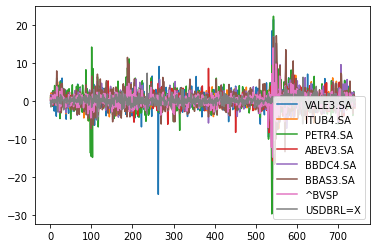

In [179]:
correlacao.plot()

# Visualização de dados usando o Seaborn

In [182]:
import seaborn as sns

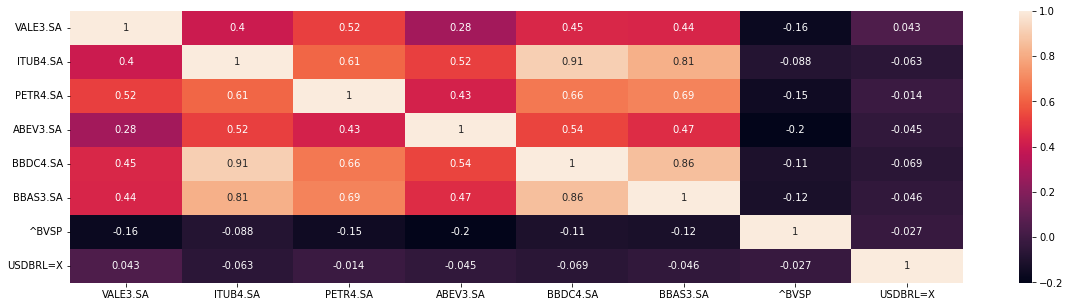

In [192]:
ax, fig = plt.subplots(figsize = (20, 5))
ax = sns.heatmap(correlacao.corr(), annot=True)

# Visualização de Dados usando Plotly

In [194]:
import plotly.graph_objs as go

In [201]:
def plot_lines(df_, columns=['Open', 'Close', 'High', 'Low']):
    
    fig = go.Figure()
    for c in columns:
        fig.add_trace(go.Scatter(x = list(df_.index),
                            y = df_[c],
                            mode = 'markers+lines',
                            name = c))
        return fig

In [203]:
plot_lines(df)

# Gerando Gráfico de Candlestick

In [217]:
def plotCandleStick(df, acao='ticket'):
    tracel = {
        'x'          : df.index,
        'open'       : df.Open,
        'close'      : df.Close,
        'high'       : df.High,
        'low'        : df.Low,
        'type'       : 'candlestick',
        'name'       : acao,
        'showlegend' : True
    }
    
    data = [tracel]
    layout = go.Layout()
    
    fig = go.Figure(data=data, layout=layout)
    return fig

In [218]:
plotCandleStick(df)